# CFS

NOAA's Climate Forecast System


In [1]:
from herbie import Herbie
from toolbox import EasyMap, pc, ccrs
import matplotlib.pyplot as plt


In [2]:
H = Herbie("2023-05-25", model="cfs_monthly", member=1, YYYYMM="202307", hour=None)

✅ Found ┊ model=cfs_monthly ┊ product=flxf ┊ 2023-May-25 00:00 UTC F00 ┊ GRIB2 @ nomads ┊ IDX @ nomads


In [3]:
H.inventory("TMP:2 m")


,grib_message,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time,search_this
37,37.0,2278920,2352874,2278920-2352874,2023-05-25,2023-05-25,TMP,2 m above ground,2-3 month ave fcst,:TMP:2 m above ground:2-3 month ave fcst


In [4]:
ds = H.xarray("TMP:2 m")


curl -s --range 2278920-2352874 "https://nomads.ncep.noaa.gov/pub/data/nccf/com/cfs/prod//cfs.20230525/00/monthly_grib_01/flxf.01.2023052500.202307.avrg.grib.grb2" > "/home/blaylock/data/cfs_monthly/20230525/subset_f2efa897__flxf.01.2023052500.202307.avrg.grib.grb2"


In [5]:
ds


<xarray.Dataset>
Dimensions:              (latitude: 190, longitude: 384)
Coordinates:
    time                 datetime64[ns] 2023-05-25
    step                 timedelta64[ns] 90 days
    heightAboveGround    float64 2.0
  * latitude             (latitude) float64 89.28 88.34 87.4 ... -88.34 -89.28
  * longitude            (longitude) float64 0.0 0.9375 1.875 ... 358.1 359.1
    valid_time           datetime64[ns] 2023-08-23
Data variables:
    t2m                  (latitude, longitude) float32 273.5 273.5 ... 225.6
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   cfs_monthly
    product:                 flxf
    description:             Climate Forecast System; Monthly Means
    remote_grib:             https://nomads.ncep.noaa.gov/pub/data/nccf/com/c...
    local_grib:              /home/blaylock/data/cfs_monthly/20230525/subset_...
    searchString:            TMP:2 m

Text(0.5, 1.0, 'Initialized:2023-05-25\nMember:1; Month:202307; Hour:None')

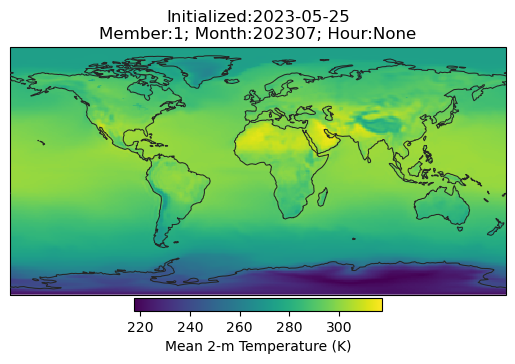

In [9]:
ax = EasyMap(crs=ds.herbie.crs).ax
art = ax.pcolormesh(ds.longitude, ds.latitude, ds.t2m, transform=pc)

plt.colorbar(
    art,
    ax=ax,
    shrink=0.5,
    pad=0.01,
    orientation="horizontal",
    label="Mean 2-m Temperature (K)",
)

ax.set_title(f"Initialized:{H.date:%Y-%m-%d}\nMember:{H.member}; Month:{H.YYYYMM}; Hour:{H.hour}")